# Connecting Rods

### Original mage

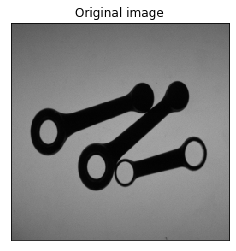

In [828]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))

original_img = cv.imread('testImages/TESI51.BMP', 0)
img = original_img.copy()
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.show()

### Apply Otsu's tresholding

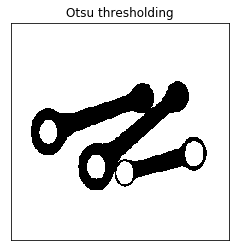

In [829]:
plt.figure(figsize=(4,4))

ret, imgf = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

### Apply dilation operation

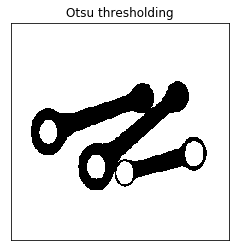

In [830]:
kernel = np.ones((2,2), np.uint8)   
# here I applied erode to background which is the dilation for foreground
dilated_image = cv.erode(imgf, kernel, iterations=1)
plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

### Labeling rods

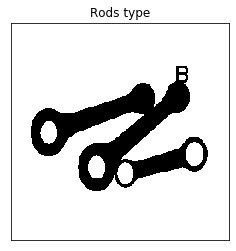

In [831]:
img, contours, hierarchy = cv.findContours(dilated_image.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0:
        if len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) == 1:
            img = cv.putText(img, 'A', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
        elif len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) > 1:
            img = cv.putText(img, 'B', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
            
plt.show()

## Position, orientation, length, width and width at the barycenter Wb 

In [810]:
img = original_img.copy()

Position:  (124.55207061767578, 136.32730102539062) , Orientation:  -13.20108699798584
Length:  199.0779571533203 , Width:  117.06932830810547 , Width at the barycenter:  107.50897216796875
------------------------------------------------------------------------------------------------


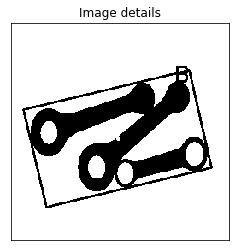

In [832]:
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0:
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        img = cv.drawContours(img,[box],0,(0, 255, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Position: ", rect[0], ", Orientation: ", rect[2])
        print("Length: ", rect[1][0] if rect[1][0] > rect[1][1] else rect[1][1], ", Width: ", 
              rect[1][1] if rect[1][1] < rect[1][0] else rect[1][0], ", Width at the barycenter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(255, 0, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

### For each hole, position of the centre and diameter size

In [833]:
img = original_img.copy()

Centre position:  (133.0, 176.0)
Diameter:  18.065731048583984
------------------------------------------------------------------------------------------------
Centre position:  (99.5, 169.5)
Diameter:  19.510433197021484
------------------------------------------------------------------------------------------------
Centre position:  (214.0, 154.0)
Diameter:  20.082462310791016
------------------------------------------------------------------------------------------------
Centre position:  (43.5, 129.0)
Diameter:  18.756349563598633
------------------------------------------------------------------------------------------------


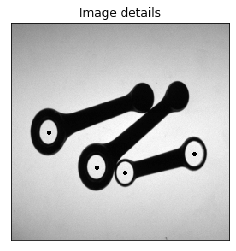

In [834]:
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] > 0:
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        #img = cv.drawContours(img,[box],0,(255, 0, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Centre position: ", rect[0])
        #print("Diameter: ", ma)
        print("Diameter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(0, 255, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

## Task 2

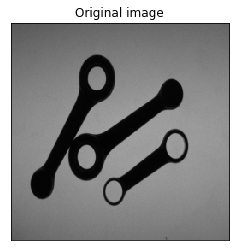

In [836]:
original_img = cv.imread('testImages/TESI50.BMP', 0)
img = original_img.copy()
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.show()

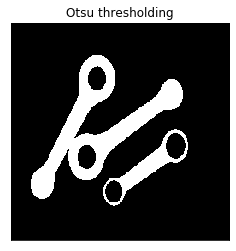

In [837]:
plt.figure(figsize=(4,4))

ret, imgf = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

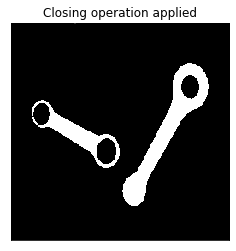

In [779]:
kernel = np.ones((2,2),np.uint8)
closing = cv.morphologyEx(imgf, cv.MORPH_OPEN, kernel)
plt.imshow(closing,cmap = 'gray')
plt.title('Closing operation applied'), plt.xticks([]), plt.yticks([])
plt.show()